# Data First Look

In [1]:
data_path = "../data"

In [2]:
import os
import matplotlib

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Understanding the data

At this point I am going to attempt to load a **T1** and a **T2** image and to investigate the shape and some of the sample data.  The final portion should even attempt to render an image _slice_ using matplotlib.  

In [3]:
def load_image_data(image_name, data_path=data_path):
    t1_image_path = os.path.join(data_path, 'hh', 't1', f'{image_name}-T1_fcm.nii.gz')
    t2_image_path = os.path.join(data_path, 'hh', 't2', f'{image_name}-T2_reg_fcm.nii.gz')

    t1_data = nib.load(t1_image_path).get_fdata()
    t2_data = nib.load(t2_image_path).get_fdata()
    
    return t1_data, t2_data
    
t1_data, t2_data = load_image_data('IXI012-HH-1211')

display(t1_data.shape)
display(t2_data.shape)
display(t1_data[0][0][:10])
display(t2_data[0][0][:10])

(240, 240, 180)

(240, 240, 180)

array([-2.74494177e-15,  5.54687953e-15,  7.44755074e-15, -1.88352904e-14,
        6.37883106e-15, -4.72959671e-13, -3.77866480e-14, -3.57576865e-15,
       -9.04797830e-13, -5.68605493e-13])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

So we can quickly see that the data is a 3d shape (as was described in the live project).  Lets grab a single slice and determine the shape of the final image. 

In [4]:
display(t1_data[:,:,0].shape)
display(t1_data[0,0,0])

(240, 240)

-2.7449417674426215e-15

Alright, lets now display an image of a slice (from **T1**)

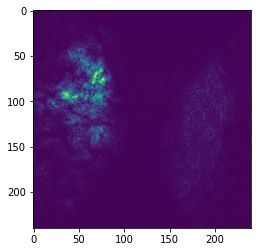

In [5]:
plt.imshow(t1_data[:,:,0])

Looks like we have some data that is rendering, but maybe our slice was not a good slice, lets look at an image at the end of the available slices. 

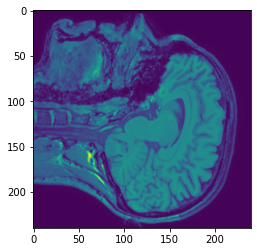

In [6]:
plt.imshow(t1_data[:,:,100])

Let's compare the above image with the corresponding slice from **T2**

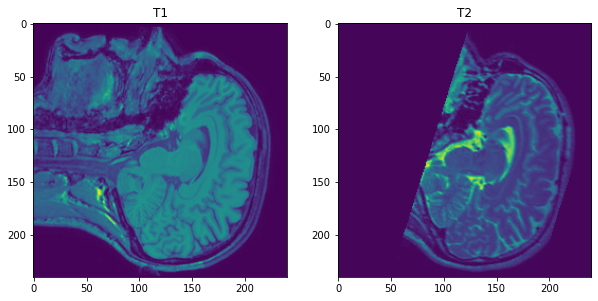

In [7]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('T1')
plt.imshow(t1_data[:,:,100])

ax = fig.add_subplot(1, 2, 2)
ax.set_title('T2')
plt.imshow(t2_data[:,:,100])
    
plt.show()

Since there are a number of different slices, let's try to get a better understanding of the overall dataset by selecting a couple of different slices at random and render them alongside the t2 versions to see how they compare.  

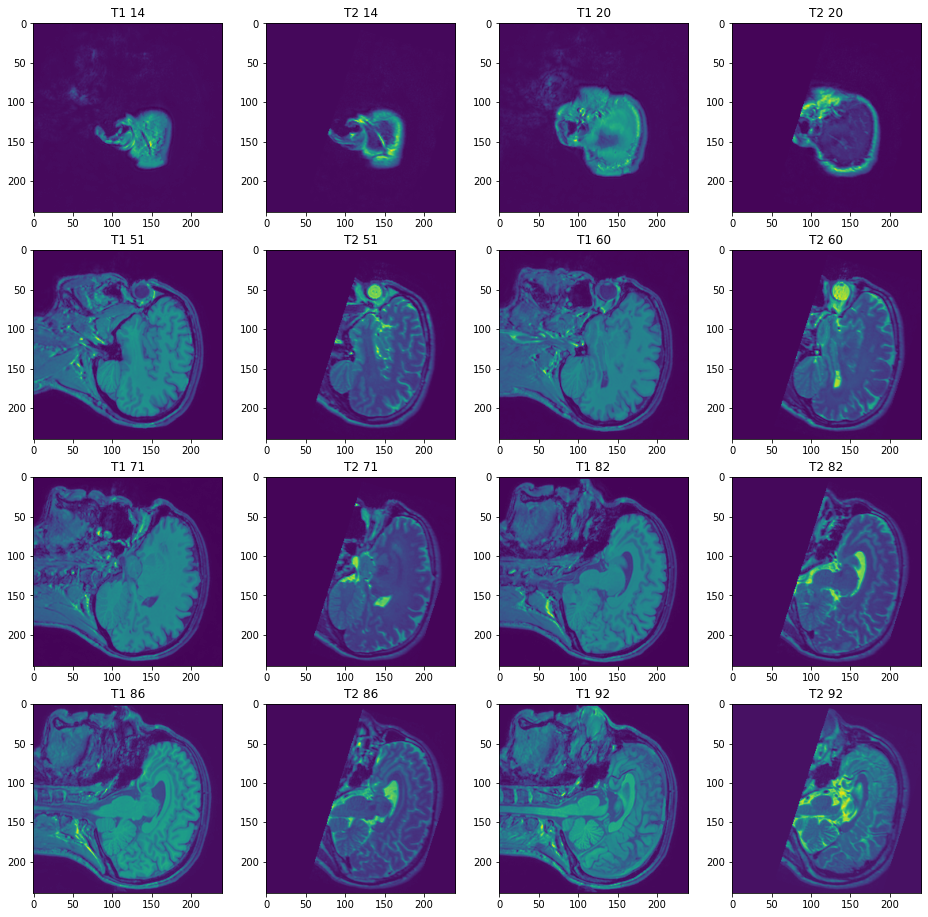

In [8]:
figsize = (16, 16)
rows, columns = 4, 4

random = np.random.RandomState(seed=42)
section_count = int((rows * columns) / 2)
selected_sections = sorted(random.choice(list(range(100)), section_count))

fig=plt.figure(figsize=figsize)
for i, section in enumerate(selected_sections):
    img_num = (i * 2)+1
    ax = fig.add_subplot(rows, columns, img_num)
    ax.set_title(f'T1 {section}')
    plt.imshow(t1_data[:,:,section])
    
    ax = fig.add_subplot(rows, columns, img_num+1)
    ax.set_title(f'T2 {section}')
    plt.imshow(t2_data[:,:,section])
    
plt.show()